Regrid each files -> average -> plot

In [1]:
import xesmf as xe
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import glob as glob
import os
import pandas as pd
from pvlib.solarposition import get_solarposition

In [2]:
# Load the dataset
files = sorted(glob.glob(
    "/ships22/raqms/lenzen/FV3GFS.9.1.2023/OMPS.NM.CLDFR1.SZA70.TROPOMICO.VIIRSAOD.FRAC.phys2.allthin25km.allHR2DEG.ext.10x10/C192/5DEGll/tracer.202308*.nc"
))
print(files)


['/ships22/raqms/lenzen/FV3GFS.9.1.2023/OMPS.NM.CLDFR1.SZA70.TROPOMICO.VIIRSAOD.FRAC.phys2.allthin25km.allHR2DEG.ext.10x10/C192/5DEGll/tracer.2023080100.5deg.ll.nc', '/ships22/raqms/lenzen/FV3GFS.9.1.2023/OMPS.NM.CLDFR1.SZA70.TROPOMICO.VIIRSAOD.FRAC.phys2.allthin25km.allHR2DEG.ext.10x10/C192/5DEGll/tracer.2023080106.5deg.ll.nc', '/ships22/raqms/lenzen/FV3GFS.9.1.2023/OMPS.NM.CLDFR1.SZA70.TROPOMICO.VIIRSAOD.FRAC.phys2.allthin25km.allHR2DEG.ext.10x10/C192/5DEGll/tracer.2023080112.5deg.ll.nc', '/ships22/raqms/lenzen/FV3GFS.9.1.2023/OMPS.NM.CLDFR1.SZA70.TROPOMICO.VIIRSAOD.FRAC.phys2.allthin25km.allHR2DEG.ext.10x10/C192/5DEGll/tracer.2023080118.5deg.ll.nc', '/ships22/raqms/lenzen/FV3GFS.9.1.2023/OMPS.NM.CLDFR1.SZA70.TROPOMICO.VIIRSAOD.FRAC.phys2.allthin25km.allHR2DEG.ext.10x10/C192/5DEGll/tracer.2023080200.5deg.ll.nc', '/ships22/raqms/lenzen/FV3GFS.9.1.2023/OMPS.NM.CLDFR1.SZA70.TROPOMICO.VIIRSAOD.FRAC.phys2.allthin25km.allHR2DEG.ext.10x10/C192/5DEGll/tracer.2023080206.5deg.ll.nc', '/ships22

In [3]:
raqms_ds = xr.open_dataset(files[0])
print(raqms_ds)
print(raqms_ds.dims)
print(raqms_ds.coords)


<xarray.Dataset> Size: 8GB
Dimensions:      (time: 1, tile: 6, grid_xt: 720, grid_yt: 361, grid_zt: 64)
Coordinates:
  * time         (time) float64 8B 213.0
  * grid_xt      (grid_xt) float64 6kB 0.0 0.5 1.0 1.5 ... 358.5 359.0 359.5
  * grid_yt      (grid_yt) float64 3kB -90.0 -89.5 -89.0 ... 89.0 89.5 90.0
  * grid_zt      (grid_zt) float64 512B 1.0 2.0 3.0 4.0 ... 61.0 62.0 63.0 64.0
Dimensions without coordinates: tile
Data variables: (12/175)
    imin         (tile) int32 24B ...
    imax         (tile) int32 24B ...
    jmin         (tile) int32 24B ...
    jmax         (tile) int32 24B ...
    lat          (time, grid_yt, grid_xt) float32 1MB ...
    lon          (time, grid_yt, grid_xt) float32 1MB ...
    ...           ...
    jo1d         (time, grid_zt, grid_yt, grid_xt) float32 67MB ...
    jno          (time, grid_zt, grid_yt, grid_xt) float32 67MB ...
    cot6hr       (time, grid_zt, grid_yt, grid_xt) float32 67MB ...
    emcofire     (time, grid_zt, grid_yt, grid_xt) fl

In [4]:
timestamp_str = os.path.basename(files[0]).split('.')[1]
timestamp = pd.to_datetime(timestamp_str, format='%Y%m%d%H')
print(timestamp)

2023-08-01 00:00:00


In [5]:
raqms_lat = raqms_ds['grid_yt'].values
raqms_lon = raqms_ds['grid_xt'].values
#Create 2D grid for lat/lon ---
lon2d, lat2d = np.meshgrid(raqms_lon, raqms_lat)  # shape (361, 720)

In [6]:
#one lat/lon per point
flat_lat = lat2d.flatten()
flat_lon = lon2d.flatten()
flat_time = np.full_like(flat_lat, fill_value=timestamp, dtype='datetime64[ns]')

In [7]:
solpos = get_solarposition(flat_time, flat_lat, flat_lon)
print(solpos)

            apparent_zenith      zenith  apparent_elevation  elevation  \
2023-08-01       108.132766  108.132766          -18.132766 -18.132766   
2023-08-01       108.132766  108.132766          -18.132766 -18.132766   
2023-08-01       108.132766  108.132766          -18.132766 -18.132766   
2023-08-01       108.132766  108.132766          -18.132766 -18.132766   
2023-08-01       108.132766  108.132766          -18.132766 -18.132766   
...                     ...         ...                 ...        ...   
2023-08-01        71.821389   71.871793           18.178611  18.128207   
2023-08-01        71.821389   71.871793           18.178611  18.128207   
2023-08-01        71.821389   71.871793           18.178611  18.128207   
2023-08-01        71.821389   71.871793           18.178611  18.128207   
2023-08-01        71.821389   71.871793           18.178611  18.128207   

               azimuth  equation_of_time  
2023-08-01  181.603103         -6.409105  
2023-08-01  181.103103   

In [8]:
sza_flat = solpos['apparent_zenith'].values
sza = sza_flat.reshape(lat2d.shape)
sza

array([[108.13276556, 108.13276556, 108.13276556, ..., 108.13276556,
        108.13276556, 108.13276556],
       [108.63256265, 108.63266598, 108.63273113, ..., 108.63202367,
        108.63224148, 108.63242115],
       [109.13235841, 109.13256568, 109.13269637, ..., 109.13127728,
        109.13171418, 109.13207457],
       ...,
       [ 72.81800412,  72.81820839,  72.81833719, ...,  72.81693863,
         72.81736921,  72.81772439],
       [ 72.3197347 ,  72.31983713,  72.31990172, ...,  72.31920039,
         72.31941631,  72.31959442],
       [ 71.82138875,  71.82138875,  71.82138875, ...,  71.82138875,
         71.82138875,  71.82138875]])

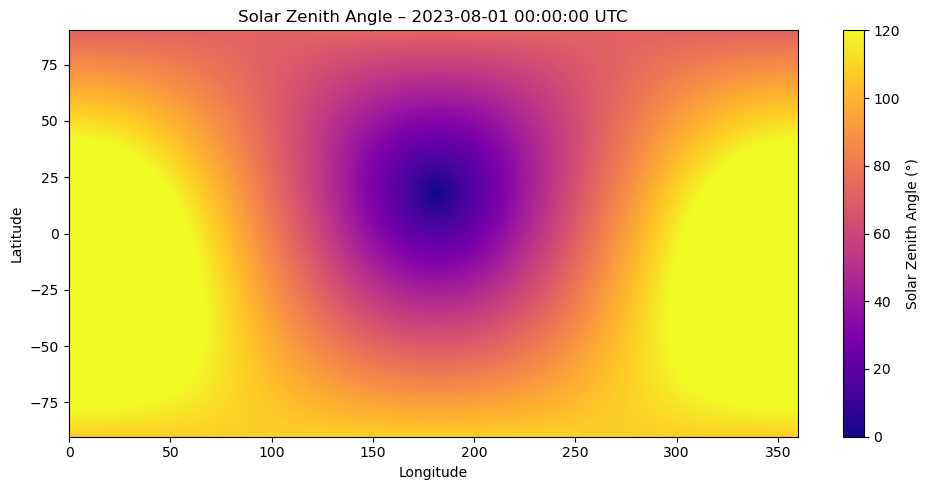

In [9]:
plt.figure(figsize=(10, 5))
plt.pcolormesh(lon2d, lat2d, sza, shading='auto', cmap='plasma', vmin=0, vmax=120)
plt.colorbar(label='Solar Zenith Angle (°)')
plt.title(f'Solar Zenith Angle – {timestamp} UTC')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

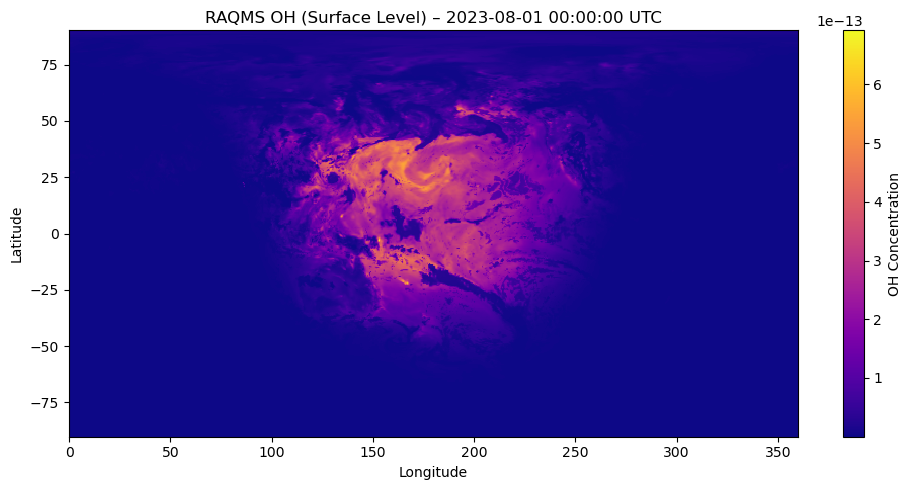

In [10]:
# OH data at surface level
oh = raqms_ds['oh'].isel(time=0, grid_zt=0).values  

plt.figure(figsize=(10, 5))
plt.pcolormesh(lon2d, lat2d, oh, shading='auto', cmap='plasma') 
plt.colorbar(label='OH Concentration')  
plt.title(f'RAQMS OH (Surface Level) – {timestamp} UTC')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()


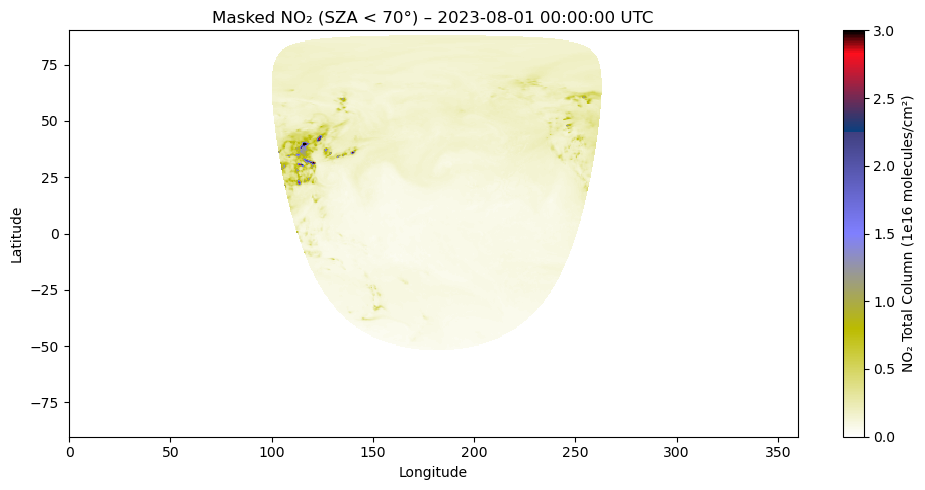

In [11]:
#mask where SZA is >= 70 degrees (keep no2 data where SZA < 70)

no2 = raqms_ds['no2tot'].isel(time=0) * 100  # Convert from 1e18 to 1e16 molecules/cm²
no2_masked = np.where(sza >= 70, np.nan, no2)

plt.figure(figsize=(10, 5))
plt.pcolormesh(lon2d, lat2d, no2_masked, shading='auto', cmap='gist_stern_r', vmin=0, vmax=3)
plt.colorbar(label='NO₂ Total Column (1e16 molecules/cm²)')
plt.title(f'Masked NO₂ (SZA < 70°) – {timestamp} UTC')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()



In [55]:
raqms_lat.shape, raqms_lon.shape

((361,), (720,))

In [15]:
tempo_file = '/ships22/raqms/Satellite/TEMPO/V03/L3/NO2/2023/TEMPO_NO2_L3_V03_20230802T151249Z_S001.nc'
tempo_ds = xr.open_dataset(tempo_file)

tempo_lat = tempo_ds['latitude']
tempo_lon = tempo_ds['longitude']
tempo_ds

<xarray.Dataset> Size: 91MB
Dimensions:    (longitude: 7750, latitude: 2950, time: 1)
Coordinates:
  * longitude  (longitude) float32 31kB -168.0 -168.0 -167.9 ... -13.03 -13.01
  * latitude   (latitude) float32 12kB 14.01 14.03 14.05 ... 72.95 72.97 72.99
  * time       (time) datetime64[ns] 8B 2023-08-02T15:13:07.138977024
Data variables:
    weight     (latitude, longitude) float32 91MB ...
Attributes: (12/40)
    history:                          2024-06-03T16:39:32Z: L2_regrid -v /tem...
    scan_num:                         1
    time_coverage_start:              2023-08-02T15:12:49Z
    time_coverage_end:                2023-08-02T16:14:59Z
    time_coverage_start_since_epoch:  1375024387.138977
    time_coverage_end_since_epoch:    1375028117.3767278
    ...                               ...
    title:                            TEMPO Level 3 nitrogen dioxide product
    collection_shortname:             TEMPO_NO2_L3
    collection_version:               1
    keywords:                         EARTH SCIENCE>ATMOSPHERE>AIR QUALITY>NI...
    summary:                          Nitrogen dioxide Level 3 files provide ...
    coremetadata:                     \nGROUP                  = INVENTORYMET...

In [16]:
source_grid = {'lat': raqms_lat, 'lon': raqms_lon}
target_grid = {'lat': tempo_lat, 'lon': tempo_lon}

In [17]:
regridder = xe.Regridder(source_grid, target_grid, method='bilinear', periodic=True)


In [18]:
#for all files

output_dir = "RAQMS_Regridded_TEMPO_nc"
os.makedirs(output_dir, exist_ok=True)

for file_path in files:
    ds = xr.open_dataset(file_path)
    timestamp_str = os.path.basename(file_path).split('.')[1]
    timestamp = pd.to_datetime(timestamp_str, format='%Y%m%d%H')

# Extract lat/lon and build 2D grid
    raqms_lat = ds['grid_yt'].values
    raqms_lon = ds['grid_xt'].values
    lon2d, lat2d = np.meshgrid(raqms_lon, raqms_lat)

# Flatten for SZA calculation
    flat_lat = lat2d.flatten()
    flat_lon = lon2d.flatten()
    flat_time = np.full_like(flat_lat, fill_value=timestamp, dtype='datetime64[ns]')
# SZA calculation  
    solpos = get_solarposition(flat_time, flat_lat, flat_lon)
    sza_flat = solpos['apparent_zenith'].values
    sza = sza_flat.reshape(lat2d.shape)

# Mask NO₂
    no2 = ds['no2tot'].isel(time=0).values * 100 # Convert from 1e18 to 1e16 molecules/cm
    no2_masked = np.where(sza >= 70, np.nan, no2)

    # Wrap as DataArray
    no2_da = xr.DataArray(
        no2_masked,
        dims=['lat', 'lon'],
        coords={'lat': raqms_lat, 'lon': raqms_lon}
    )

# Regrid
    no2_regridded = regridder(no2_da)

# Save regridded nc files
    base = os.path.basename(file_path)
    out_path = os.path.join(output_dir, base)
    out_ds = xr.Dataset({'no2tot': no2_regridded})
    out_ds.to_netcdf(out_path)
    print(f"Saved regridded file: {out_path}")



/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023080100.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023080106.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023080112.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023080118.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023080200.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023080206.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023080212.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023080218.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023080300.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023080306.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023080312.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023080318.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023080400.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023080406.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023080412.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023080418.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023080500.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023080506.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023080512.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023080518.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023080600.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023080606.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023080612.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023080618.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023080700.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023080706.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023080712.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023080718.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023080800.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023080806.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023080812.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023080818.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023080900.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023080906.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023080912.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023080918.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023081000.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023081006.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023081012.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023081018.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023081100.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023081106.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023081112.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023081118.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023081200.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023081206.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023081212.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023081218.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023081300.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023081306.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023081312.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023081318.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023081400.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023081406.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023081412.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023081418.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023081500.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023081506.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023081512.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023081518.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023081600.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023081606.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023081612.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023081618.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023081700.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023081706.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023081712.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023081718.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023081800.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023081806.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023081812.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023081818.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023081900.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023081906.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023081912.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023081918.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023082000.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023082006.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023082012.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023082018.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023082100.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023082106.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023082112.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023082118.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023082200.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023082206.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023082212.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023082218.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023082300.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023082306.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023082312.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023082318.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023082400.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023082406.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023082412.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023082418.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023082500.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023082506.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023082512.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023082518.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023082600.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023082606.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023082612.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023082618.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023082700.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023082706.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023082712.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023082718.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023082800.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023082806.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023082812.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023082818.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023082900.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023082906.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023082912.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023082918.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023083000.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023083006.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023083012.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023083018.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023083100.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023083106.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023083112.5deg.ll.nc


/home/alubianashari/miniconda3/envs/aqms/lib/python3.9/site-packages/xesmf/frontend.py:716: UserWarning: Using dimensions ('lat', 'lon') from data variable None as the horizontal dimensions for the regridding.
  warnings.warn(


Saved regridded file: RAQMS_Regridded_TEMPO_nc/tracer.2023083118.5deg.ll.nc


In [19]:
n_files = sorted(glob.glob("/home/alubianashari/RAQMS_Regridded_TEMPO_nc/tracer.202308*.nc"))
print(n_files)

['/home/alubianashari/RAQMS_Regridded_TEMPO_nc/tracer.2023080100.5deg.ll.nc', '/home/alubianashari/RAQMS_Regridded_TEMPO_nc/tracer.2023080106.5deg.ll.nc', '/home/alubianashari/RAQMS_Regridded_TEMPO_nc/tracer.2023080112.5deg.ll.nc', '/home/alubianashari/RAQMS_Regridded_TEMPO_nc/tracer.2023080118.5deg.ll.nc', '/home/alubianashari/RAQMS_Regridded_TEMPO_nc/tracer.2023080200.5deg.ll.nc', '/home/alubianashari/RAQMS_Regridded_TEMPO_nc/tracer.2023080206.5deg.ll.nc', '/home/alubianashari/RAQMS_Regridded_TEMPO_nc/tracer.2023080212.5deg.ll.nc', '/home/alubianashari/RAQMS_Regridded_TEMPO_nc/tracer.2023080218.5deg.ll.nc', '/home/alubianashari/RAQMS_Regridded_TEMPO_nc/tracer.2023080300.5deg.ll.nc', '/home/alubianashari/RAQMS_Regridded_TEMPO_nc/tracer.2023080306.5deg.ll.nc', '/home/alubianashari/RAQMS_Regridded_TEMPO_nc/tracer.2023080312.5deg.ll.nc', '/home/alubianashari/RAQMS_Regridded_TEMPO_nc/tracer.2023080318.5deg.ll.nc', '/home/alubianashari/RAQMS_Regridded_TEMPO_nc/tracer.2023080400.5deg.ll.nc'

In [20]:
#grouping files by day
daily_files = {}
for f in n_files:
    filename = os.path.basename(f)
    timestamp = filename.split('.')[1]
    date_str = timestamp[:8]

    if date_str not in daily_files:
        daily_files[date_str] = [f]
    else:
        daily_files[date_str].append(f)
print(daily_files.keys())

dict_keys(['20230801', '20230802', '20230803', '20230804', '20230805', '20230806', '20230807', '20230808', '20230809', '20230810', '20230811', '20230812', '20230813', '20230814', '20230815', '20230816', '20230817', '20230818', '20230819', '20230820', '20230821', '20230822', '20230823', '20230824', '20230825', '20230826', '20230827', '20230828', '20230829', '20230830', '20230831'])


In [21]:
day_files = daily_files['20230802']
print(day_files)

['/home/alubianashari/RAQMS_Regridded_TEMPO_nc/tracer.2023080200.5deg.ll.nc', '/home/alubianashari/RAQMS_Regridded_TEMPO_nc/tracer.2023080206.5deg.ll.nc', '/home/alubianashari/RAQMS_Regridded_TEMPO_nc/tracer.2023080212.5deg.ll.nc', '/home/alubianashari/RAQMS_Regridded_TEMPO_nc/tracer.2023080218.5deg.ll.nc']


In [23]:
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

# --- Helper Functions ---
def plot_background(ax):
    ax.add_feature(cf.LAKES.with_scale('10m'), facecolor='none', edgecolor='black', linewidth=0.8)
    ax.add_feature(cf.COASTLINE.with_scale('10m'), facecolor='none', edgecolor='black', linewidth=1)
    ax.add_feature(cf.BORDERS.with_scale('10m'), linestyle=':')
    return ax

def plot_ticks(ax, lon_min, lon_max, lat_min, lat_max):
    ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter(number_format='.0f', degree_symbol='°'))
    ax.yaxis.set_major_formatter(LatitudeFormatter(number_format='.0f', degree_symbol='°'))
    return ax

# make directory for figures
os.makedirs("Regridded_RAQMS_TEMPO_Figures", exist_ok=True)

# Plotting NO2 for a specific day
# Loop through the dates and plot the NO2 data
dates = [
    '20230801', '20230802', '20230803', '20230804', '20230805',
    '20230806', '20230807', '20230808', '20230809', '20230810',
    '20230811', '20230812', '20230813', '20230814', '20230815',
    '20230816', '20230817', '20230818', '20230819', '20230820',
    '20230821', '20230822', '20230824', '20230825',
    '20230826', '20230828', '20230829', '20230830',
    '20230831'
]

for i in range(len(dates)):
    date = dates[i]
    print(date)
    day_files = daily_files[date]

    datasets = xr.open_dataset(day_files[0])
    lat = datasets['latitude']
    lon = datasets['longitude']
    ds_NO2_00 = np.array(datasets['no2tot'])
    datasets = xr.open_dataset(day_files[1])
    ds_NO2_06 = np.array(datasets['no2tot'])
    datasets = xr.open_dataset(day_files[2])
    ds_NO2_12 = np.array(datasets['no2tot'])
    datasets = xr.open_dataset(day_files[3])
    ds_NO2_18 = np.array(datasets['no2tot'])
    # Stack and average NO2
    ds_NO2 = np.stack([ds_NO2_00, ds_NO2_06, ds_NO2_12, ds_NO2_18], axis=0)
    no2_daily_avg = np.nanmean(ds_NO2, axis=0)


# Plotting
    fig = plt.figure(figsize=(10, 6), dpi=150)
    ax = plt.axes(projection=ccrs.PlateCarree())

    # Set map extent
    lon_min, lon_max = lon.min(), lon.max()
    lat_min, lat_max = lat.min(), lat.max()
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

    plot_background(ax)
    plot_ticks(ax, lon_min, lon_max, lat_min, lat_max)

    mesh = ax.pcolormesh(lon, lat, no2_daily_avg, cmap="gist_stern_r", vmin=0, vmax=3, transform=ccrs.PlateCarree())
    plt.colorbar(mesh, orientation='horizontal', label='Daily Avg NO₂ (10¹⁶ molecules/cm²)', fraction=0.046, pad=0.1)

    ax.set_title(f'RAQMS Daily Avg NO₂ Total Column – {date}')
    plt.savefig(f"Regridded_RAQMS_TEMPO_Figures/{date}.png", facecolor='white', bbox_inches='tight')
    plt.close()


20230801


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230802


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230803


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230804


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230805


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230806


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230807


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230808


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230809


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230810


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230811


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230812


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230813


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230814


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230815


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230816


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230817


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230818


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230819


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230820


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230821


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230822


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230824


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230825


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230826


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230828


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230829


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230830


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


20230831


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


In [25]:
# New output folder (optional)
os.makedirs("Regridded_RAQMS_TEMPO_Contributions", exist_ok=True)

for date in dates:
    print(f"Counting contributions for {date}")
    day_files = daily_files[date]

    no2_stack = []
    for idx, f in enumerate(day_files):
        ds = xr.open_dataset(f)
        no2 = np.array(ds['no2tot'])
        no2_stack.append(no2)

        if idx == 0:
            lat = ds['latitude']
            lon = ds['longitude']

    no2_stack = np.stack(no2_stack, axis=0)  # shape: (4, lat, lon)
    contribution_count = np.sum(~np.isnan(no2_stack), axis=0)

    # Plotting
    fig = plt.figure(figsize=(10, 6), dpi=150)
    ax = plt.axes(projection=ccrs.PlateCarree())

    lon_min, lon_max = lon.min(), lon.max()
    lat_min, lat_max = lat.min(), lat.max()
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

    plot_background(ax)
    plot_ticks(ax, lon_min, lon_max, lat_min, lat_max)

    mesh = ax.pcolormesh(
        lon, lat, contribution_count,
        cmap='viridis', vmin=0, vmax=4,
        transform=ccrs.PlateCarree()
    )

    plt.colorbar(mesh, orientation='horizontal', label='Valid Time Steps (0–4)', fraction=0.046, pad=0.1)
    ax.set_title(f'Time Steps Contributing to RAQMS Daily Avg – {date}')
    plt.savefig(f"Regridded_RAQMS_TEMPO_Contributions/{date}_contribution.png", facecolor='white', bbox_inches='tight')
    plt.close()


Counting contributions for 20230801


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


Counting contributions for 20230802


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


Counting contributions for 20230803


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


Counting contributions for 20230804


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


Counting contributions for 20230805


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


Counting contributions for 20230806


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


Counting contributions for 20230807


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


Counting contributions for 20230808


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


Counting contributions for 20230809


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


Counting contributions for 20230810


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


Counting contributions for 20230811


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


Counting contributions for 20230812


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


Counting contributions for 20230813


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


Counting contributions for 20230814


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


Counting contributions for 20230815


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


Counting contributions for 20230816


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


Counting contributions for 20230817


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


Counting contributions for 20230818


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


Counting contributions for 20230819


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


Counting contributions for 20230820


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


Counting contributions for 20230821


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


Counting contributions for 20230822


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


Counting contributions for 20230824


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


Counting contributions for 20230825


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


Counting contributions for 20230826


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


Counting contributions for 20230828


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


Counting contributions for 20230829


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


Counting contributions for 20230830


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())


Counting contributions for 20230831


/tmp/ipykernel_4187404/4182922437.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_xticks(np.arange(np.floor(lon_min), np.ceil(lon_max)+1, 10), crs=ccrs.PlateCarree())
/tmp/ipykernel_4187404/4182922437.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  ax.set_yticks(np.arange(np.floor(lat_min), np.ceil(lat_max)+1, 10), crs=ccrs.PlateCarree())
